<a href="https://colab.research.google.com/github/saricongi/Exam_ML_Unipv_2023_SC/blob/master/1D_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.sparse import load_npz
import h5py

In [22]:
# directory = 'https://github.com/saricongi/Exam_ML_Unipv_2023_SC.git'
!git clone https://github.com/saricongi/Exam_ML_Unipv_2023_SC.git
!curl https://github.com/saricongiExam_ML_Unipv_2023_SC.git

fatal: destination path 'Exam_ML_Unipv_2023_SC' already exists and is not an empty directory.
Not Found

The dataset is made by transmission optical spectra of optical resonators integrated on a silicon chip as the one shown here:  
<div>
<img src="https://github.com/saricongi/Exam_ML_Unipv_2023_SC/blob/master/device.png?raw=1" width="800"/>
</div>

A typical mesured spectrum can have a shape as the following:
<div>
<img src="https://github.com/saricongi/Exam_ML_Unipv_2023_SC/blob/master/Example.png?raw=1" width="600"/>
</div>

The analysis of this type of spectra with theoretical models is not straightforward, because one single resonance is given by the contribution of both ring resonators, with interference occuring between the two. For application in light storing and optical switchers, we are interested on the devices and wavelength ranges where double peaks occurs.

The goal of this ML project is to correctly recognize if a resonance is showing the  single-peak or the double-peak behaviour. Therefore, each spectrum has a label *z* to classify it into the two possible groups (*binary classification problem*).

Since it is a periodic pattern, the full wavelength (*wl*) scan has been splitted in different arrays of equal length (*300*), each of them contains a single resonance. In this way, more than 6000 resonance spectra have been recorded, divided in *train* and *test* datasets.

Moreover, the information on the absolute wl is not of our interest, thus we are going to normalize it (*x* between 0 and 1). Since independetly on the resonance position we want to be able to classify the peaks, our problem exibits *translational symmetry*. For this reason, the model implemented is a **1D CNN**.


**DATASETs STRUCTURE:**

* **Train dataset = 3532 spectra**
* **Test (or evaluation) dataset = 3569 spectra**
* **1 spectrum = 300 wavelength points -> y**.
* **Nb labels = 2 -> z**, *z=0* if there is only one visible peak, *z=1* if the resonance is splittend into 2 peaks.

## **Train Dataset:**

<KeysViewHDF5 ['Die0', 'Die1', 'Die2', 'Die3']>
<KeysViewHDF5 ['Subdie24', 'Subdie25', 'Subdie26', 'Subdie27', 'Subdie28', 'Subdie29', 'Subdie30', 'Subdie31', 'Subdie32', 'Subdie33', 'Subdie34', 'Subdie35', 'Subdie36', 'Subdie37', 'Subdie38', 'Subdie39', 'Subdie40', 'Subdie41', 'Subdie42', 'Subdie43', 'Subdie44', 'Subdie45']>
<KeysViewHDF5 ['x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x2', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x3', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x4', 'x40', 'x41', 'x42', 'x5', 'x6', 'x7', 'x8', 'x9', 'y1', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y2', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y3', 'y30', 'y31', 'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y4', 'y40', 'y41', 'y42', 'y5', 'y6', 'y7', 'y8', 'y9', 'z1', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z2', 'z20'

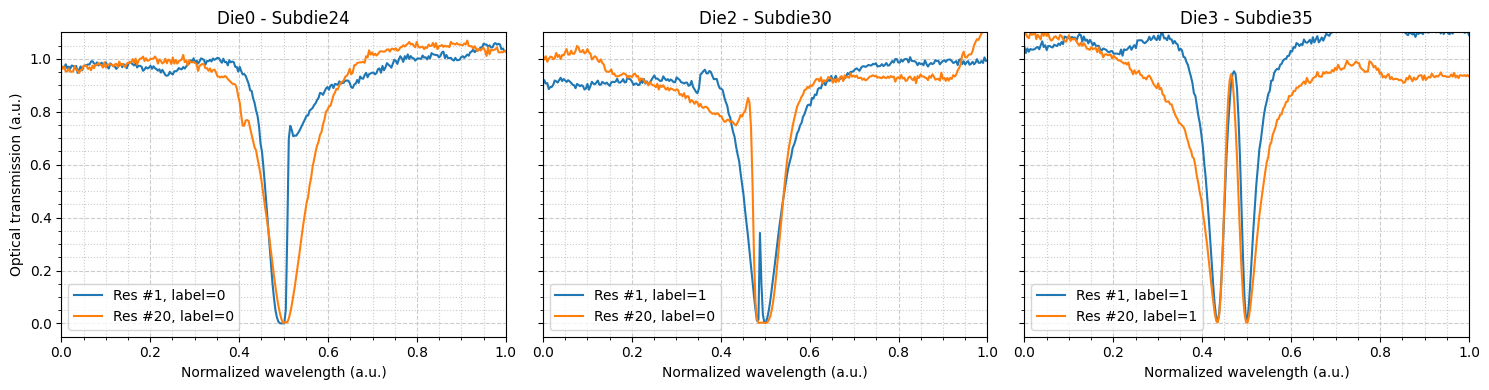

In [23]:
## Train DataSet
url = '/content/Exam_ML_Unipv_2023_SC/DataSet_train.h5'

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(15,4), nrows=1, ncols=3, tight_layout=True)
for ax in fig.get_axes():
  ax.minorticks_on()
  ax.tick_params(axis='x', which='both', direction='out')
  ax.grid(which='major', color='#CCCCCC', linestyle='--')
  ax.grid(which='minor', color='#CCCCCC', linestyle=':')
  ax.set_ylim(-0.05,1.1)
  ax.set_xlim(0,1)
  ax.set_xlabel('Normalized wavelength (a.u.)')
  ax.set_ylabel('Optical transmission (a.u.)')
  ax.label_outer()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#plot 1
i=0
j=24
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=1
ResNb2=20

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())


x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))
l=len(x1)
print('\n Length of x and y arrays:', l, '\n')
x=np.linspace(0,1,l) #normalized x-array

ax1.set_title(Group+' - '+Subgroup)
ax1.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax1.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax1.legend()

#plot 2
i=2
j=30
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=1
ResNb2=20

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())

x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))

ax2.set_title(Group+' - '+Subgroup)
ax2.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax2.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax2.legend()

#plot 3
i=3
j=35
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=1
ResNb2=20

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())

x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))

ax3.set_title(Group+' - '+Subgroup)
ax3.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax3.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax3.legend()

### **Geneting the arrays suitable for keras ML algorithms**

In [24]:
NbDies=4
NbSubDies=45
DIES = np.linspace(0,NbDies-1,NbDies,dtype=int)
SUBDIES = np.linspace(24,NbSubDies-1,NbSubDies-24,dtype=int)

target = []
ytrain = []
xtrain = []

for i in (DIES):
  Group='Die'+str(i)
  # print('Die',i)

  for j in (SUBDIES):
    Subgroup='Subdie'+str(j)
    # print('Subdie',j)
    g = hf.get(Group)
    sg = g.get(Subgroup)
    # print(sg.keys())
    NbRes=int(len(sg.keys())/3)
    # print('Total # of reosonances=', NbRes)

    for k in range(NbRes):
      k=k+1
      # print('k=',k)
      my_ytrain = np.array(sg.get('y'+str(k)))
      my_target = np.array(sg.get('z'+str(k)))
      # print('z',k,'=',my_target)
      ytrain.append(my_ytrain)
      target.append(my_target)
      xtrain.append(x)

ytrain=np.array(ytrain).reshape(-1,300,1)
ztrain=np.array(target).reshape(-1,1)
xtrain=np.array(xtrain).reshape(-1,300,1)

print("xtrain shape: ", xtrain.shape)
print("ytrain shape: ", ytrain.shape)
print("ztrain shape: ", ztrain.shape)

hf.close()

xtrain shape:  (3532, 300, 1)
ytrain shape:  (3532, 300, 1)
ztrain shape:  (3532, 1)


### Let's check that in the train dataset there the two labels are well distributed:

Text(0.5, 0, 'sample associated label')

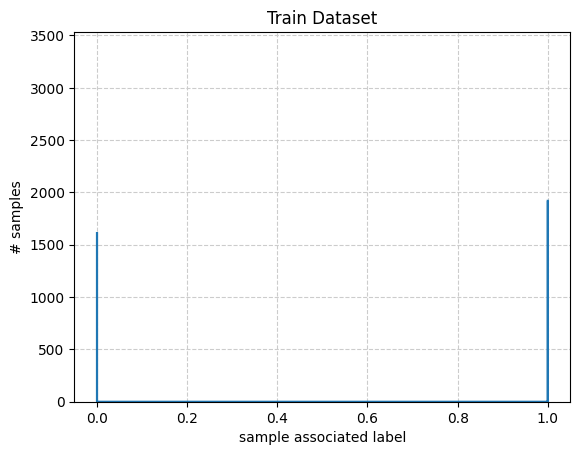

In [25]:
plt.hist(ztrain, len(ztrain[:,0]), density=True, histtype='step', fill=True, linewidth=1.5)
plt.title("Train Dataset")
plt.ylabel("# samples")
plt.ylim(0,len(ztrain[:,0]))
plt.tick_params(axis='y', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.xlabel("sample associated label")

## **1D CNN MODEL**

In [26]:
# keras imports
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Dropout, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TerminateOnNaN

In [27]:
featureArrayLength = (ytrain.shape[1],ytrain.shape[2])
dropoutRate = 0.25

batch_size = 128
n_epochs = 50
n_neurons = 16

# CNN 1D
####
inputList = Input(shape=(featureArrayLength))
x = Conv1D(20, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(inputList)
x = AveragePooling1D(pool_size=2)(x)
# #
x = Conv1D(40, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
x = AveragePooling1D(pool_size=4)(x)
# #
x = Conv1D(60, kernel_size=3, data_format="channels_last", strides=1, padding="valid", activation='relu')(x)
x = AveragePooling1D(pool_size=8)(x)

# (inputList)
x = Flatten()(x)
x = Dense(n_neurons, activation='relu')(x)
x = Dropout(dropoutRate)(x)
output = Dense(1, activation='sigmoid')(x)
####
model = Model(inputs=inputList, outputs=output)

In [28]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(inputList)
model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 300, 1), dtype=tf.float32, name='input_3'), name='input_3', description="created by layer 'input_3'")
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300, 1)]          0         
                                                                 
 conv1d_2 (Conv1D)           (None, 298, 20)           80        
                                                                 
 average_pooling1d_2 (Averag  (None, 149, 20)          0         
 ePooling1D)                                                     
                                                                 
 conv1d_3 (Conv1D)           (None, 147, 40)           2440      
                                                                 
 average_pooling1d_3 (Averag  (None, 36, 40)           0         
 ePooling1D)                               

## **Test Dataset**

<KeysViewHDF5 ['Die4', 'Die5', 'Die6', 'Die7']>
<KeysViewHDF5 ['Subdie24', 'Subdie25', 'Subdie26', 'Subdie27', 'Subdie28', 'Subdie29', 'Subdie30', 'Subdie31', 'Subdie32', 'Subdie33', 'Subdie34', 'Subdie35', 'Subdie36', 'Subdie37', 'Subdie38', 'Subdie39', 'Subdie40', 'Subdie41', 'Subdie42', 'Subdie43', 'Subdie44', 'Subdie45']>
<KeysViewHDF5 ['x1', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x2', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x3', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x4', 'x40', 'x41', 'x42', 'x5', 'x6', 'x7', 'x8', 'x9', 'y1', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y2', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y3', 'y30', 'y31', 'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y4', 'y40', 'y41', 'y42', 'y5', 'y6', 'y7', 'y8', 'y9', 'z1', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z2', 'z20'

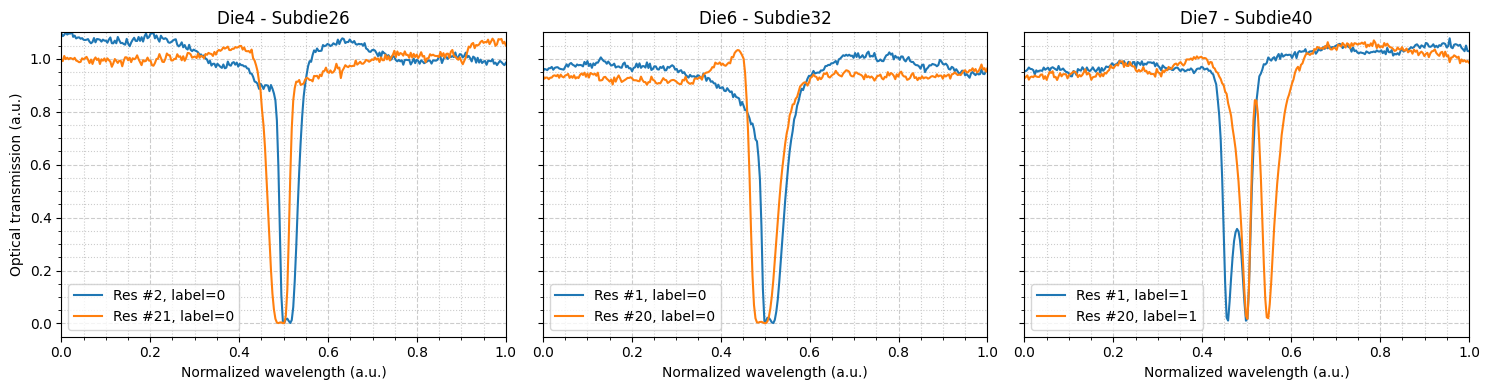

In [29]:
## Test DataSet

url = '/content/Exam_ML_Unipv_2023_SC/DataSet_test.h5'

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(15,4), nrows=1, ncols=3, tight_layout=True)
for ax in fig.get_axes():
  ax.minorticks_on()
  ax.tick_params(axis='x', which='both', direction='out')
  ax.grid(which='major', color='#CCCCCC', linestyle='--')
  ax.grid(which='minor', color='#CCCCCC', linestyle=':')
  ax.set_ylim(-0.05,1.1)
  ax.set_xlim(0,1)
  ax.set_xlabel('Normalized wavelength (a.u.)')
  ax.set_ylabel('Optical transmission (a.u.)')
  ax.label_outer()
plt.subplots_adjust(hspace=0.3, wspace=0.3)

#plot 1
i=4
j=26
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=2
ResNb2=21

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())


x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))
l=len(x1)
print('\n Length of x and y arrays:', l, '\n')
x=np.linspace(0,1,l) #normalized x-array

ax1.set_title(Group+' - '+Subgroup)
ax1.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax1.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax1.legend()

#plot 2
i=6
j=32
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=1
ResNb2=20

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())

x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))

ax2.set_title(Group+' - '+Subgroup)
ax2.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax2.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax2.legend()

#plot 3
i=7
j=40
Group='Die'+str(i)
Subgroup='Subdie'+str(j)
ResNb=1
ResNb2=20

hf = h5py.File(url)
print(hf.keys())
g = hf.get(Group)
print(g.keys())
sg = g.get(Subgroup)
print(sg.keys())

x1 = sg.get('x'+str(ResNb))
print(x1)
x1=np.array(x1)
y1 = np.array(sg.get('y'+str(ResNb)))
z1 = np.array(sg.get('z'+str(ResNb)))

ax3.set_title(Group+' - '+Subgroup)
ax3.plot(x,y1, label='Res #'+str(ResNb)+', label='+str(z1))

x1 = np.array(sg.get('x'+str(ResNb2)))
y1 = np.array(sg.get('y'+str(ResNb2)))
z1 = np.array(sg.get('z'+str(ResNb2)))

ax3.plot(x,y1, label='Res #'+str(ResNb2)+', label='+str(z1))
ax3.legend()

## **Geneting the arrays suitable for keras ML algorithms**

(3569, 1) (3569, 300, 1) (3569, 300, 1)


Text(0.5, 0, 'sample associated label')

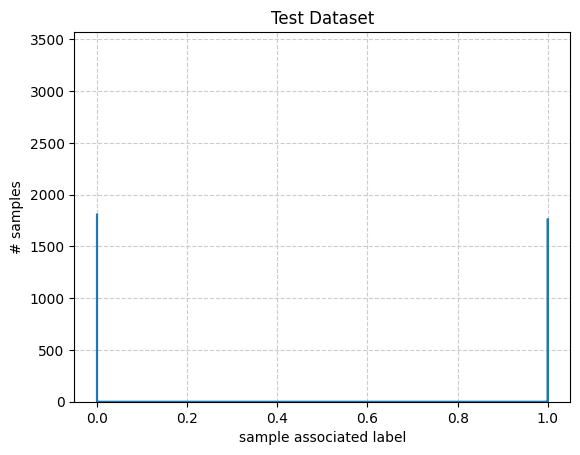

In [30]:
NbDies=4
NbSubDies=45
DIES = np.linspace(4,4+NbDies-1,NbDies,dtype=int)
SUBDIES = np.linspace(24,NbSubDies-1,NbSubDies-24,dtype=int)

target = []
ytest = []
xtest = []

for i in (DIES):
  Group='Die'+str(i)
  # print('Die',i)

  for j in (SUBDIES):
    Subgroup='Subdie'+str(j)
    # print('Subdie',j)
    g = hf.get(Group)
    sg = g.get(Subgroup)
    # print(sg.keys())
    NbRes=int(len(sg.keys())/3)
    # print('Total # of reosonances=', NbRes)

    for k in range(NbRes):
      k=k+1
      # print('k=',k)
      my_ytest = np.array(sg.get('y'+str(k)))
      my_target = np.array(sg.get('z'+str(k)))
      # print('z',k,'=',my_target)
      ytest.append(my_ytest)
      target.append(my_target)
      xtest.append(x)

ytest=np.array(ytest).reshape(-1,300,1)
ztest=np.array(target).reshape(-1,1)
xtest=np.array(xtest).reshape(-1,300,1)
print(ztest.shape, ytest.shape, xtest.shape)

# ztest = to_categorical(target, num_classes = 2)
# print("New dimension of test target:")
# print(ztest.shape)

# hf.close()

plt.hist(ztest, len(ztest[:,0]), density=True, histtype='step', fill=True, linewidth=1.5)
plt.title("Test Dataset")
plt.ylabel("# samples")
plt.ylim(0,len(ztest[:,0]))
plt.tick_params(axis='y', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.xlabel("sample associated label")

## **TRAIN**

In [31]:
# train
history = model.fit( ytrain, ztrain, epochs=n_epochs, batch_size=batch_size, verbose = 2,
                validation_data=(ytest, ztest),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                TerminateOnNaN()] )

Epoch 1/50
28/28 - 7s - loss: 0.6891 - accuracy: 0.5439 - val_loss: 0.6956 - val_accuracy: 0.4937 - lr: 0.0010 - 7s/epoch - 245ms/step
Epoch 2/50
28/28 - 1s - loss: 0.6817 - accuracy: 0.5626 - val_loss: 0.6781 - val_accuracy: 0.6248 - lr: 0.0010 - 1s/epoch - 51ms/step
Epoch 3/50
28/28 - 2s - loss: 0.6575 - accuracy: 0.6390 - val_loss: 0.6452 - val_accuracy: 0.5343 - lr: 0.0010 - 2s/epoch - 60ms/step
Epoch 4/50
28/28 - 2s - loss: 0.5695 - accuracy: 0.7780 - val_loss: 0.5098 - val_accuracy: 0.8582 - lr: 0.0010 - 2s/epoch - 61ms/step
Epoch 5/50
28/28 - 2s - loss: 0.4132 - accuracy: 0.8584 - val_loss: 0.4200 - val_accuracy: 0.8041 - lr: 0.0010 - 2s/epoch - 60ms/step
Epoch 6/50
28/28 - 2s - loss: 0.2932 - accuracy: 0.8933 - val_loss: 0.3021 - val_accuracy: 0.8941 - lr: 0.0010 - 2s/epoch - 88ms/step
Epoch 7/50
28/28 - 2s - loss: 0.2232 - accuracy: 0.9187 - val_loss: 0.2535 - val_accuracy: 0.9162 - lr: 0.0010 - 2s/epoch - 71ms/step
Epoch 8/50
28/28 - 2s - loss: 0.1823 - accuracy: 0.9405 - val

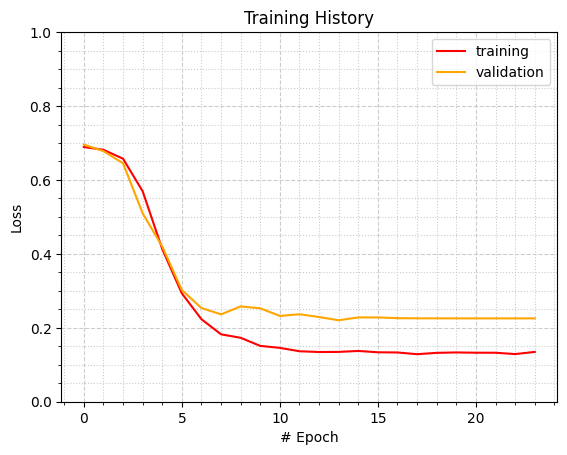

In [32]:
# plot training history
Tloss_CNN=history.history['loss']
Vloss_CNN=history.history['val_loss']
plt.plot(Tloss_CNN,color='red')
plt.plot(Vloss_CNN,color='orange')
# plt.yscale('log')
plt.title('Training History')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.xlabel('# Epoch')
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

ztest shape:
(3569, 1)
112/112 [==============================] - 1s 6ms/step
Predict shape:
(3569, 1)


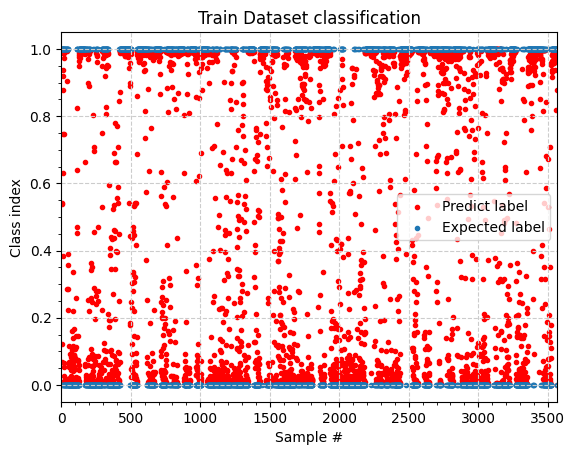

In [33]:
print("ztest shape:")
print(ztest.shape)
predict = model.predict(ytest)
print("Predict shape:")
print(predict.shape)

plt.scatter(np.linspace(1,len(predict[:,0]),len(predict[:,0])), predict[:,0], color='red', marker='.', label='Predict label')
plt.scatter(np.linspace(1,len(predict[:,0]),len(predict[:,0])), ztest[:,0], color='C0', marker='.', label='Expected label')
plt.title('Train Dataset classification')
plt.ylabel('Class index')
plt.xlim(0,len(predict[:,0]))
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
# plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Sample #')
plt.legend()

<class 'numpy.float64'>


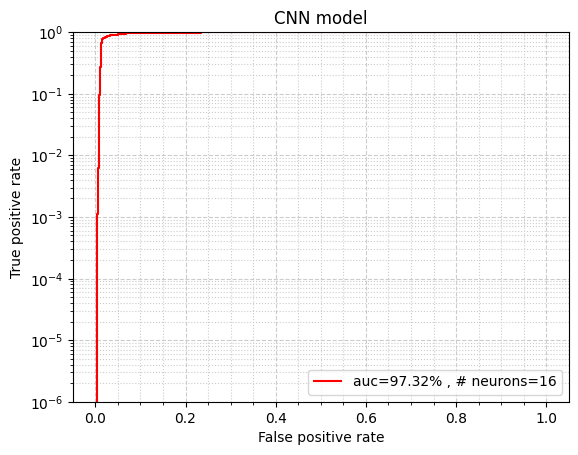

In [34]:
import pandas as pd
from sklearn.metrics import roc_curve, auc

df = pd.DataFrame()
fpr = {}
tpr = {}
auc1 = {}

fpr, tpr, threshold = roc_curve(ztest,predict)

auc1 = auc(fpr, tpr)
print(type(auc1))
plt.plot(fpr,tpr, label='auc='+str(np.round(auc1*100,2))+'% , # neurons='+str(n_neurons), color='red')

plt.semilogy()
plt.ylim(0.000001,1)
plt.title("CNN model")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(loc='lower right')

# **MLP Model**

In [35]:
#MLP
dropoutRateMLP = dropoutRate

batch_sizeMLP = batch_size
n_epochsMLP = n_epochs
n_neuronsMLP = n_neurons

####
inputList = Input(shape=(featureArrayLength))

x = Dense(n_neuronsMLP, activation='relu')(inputList[:,:,0])
x = Dropout(dropoutRate)(x)
output = Dense(1, activation='sigmoid')(x)

####
modelMLP = Model(inputs=inputList, outputs=output)

In [36]:
modelMLP.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(inputList)
modelMLP.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 300, 1), dtype=tf.float32, name='input_4'), name='input_4', description="created by layer 'input_4'")
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 1)]          0         
                                                                 
 tf.__operators__.getitem_1   (None, 300)              0         
 (SlicingOpLambda)                                               
                                                                 
 dense_6 (Dense)             (None, 16)                4816      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                           

In [37]:
# train
history = modelMLP.fit( ytrain, ztrain, epochs=n_epochsMLP, batch_size=batch_sizeMLP, verbose = 2,
                validation_data=(ytest, ztest),
                callbacks = [
                EarlyStopping(monitor='val_loss', patience=10, verbose=1),
                ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1),
                TerminateOnNaN()] )


Epoch 1/50
28/28 - 1s - loss: 0.8352 - accuracy: 0.5306 - val_loss: 0.6723 - val_accuracy: 0.5259 - lr: 0.0010 - 1s/epoch - 36ms/step
Epoch 2/50
28/28 - 0s - loss: 0.6462 - accuracy: 0.6467 - val_loss: 0.6287 - val_accuracy: 0.6425 - lr: 0.0010 - 149ms/epoch - 5ms/step
Epoch 3/50
28/28 - 0s - loss: 0.6043 - accuracy: 0.7075 - val_loss: 0.5803 - val_accuracy: 0.8159 - lr: 0.0010 - 122ms/epoch - 4ms/step
Epoch 4/50
28/28 - 0s - loss: 0.5715 - accuracy: 0.7503 - val_loss: 0.5485 - val_accuracy: 0.8254 - lr: 0.0010 - 143ms/epoch - 5ms/step
Epoch 5/50
28/28 - 0s - loss: 0.5442 - accuracy: 0.7749 - val_loss: 0.5211 - val_accuracy: 0.8268 - lr: 0.0010 - 145ms/epoch - 5ms/step
Epoch 6/50
28/28 - 0s - loss: 0.5119 - accuracy: 0.7885 - val_loss: 0.4951 - val_accuracy: 0.8302 - lr: 0.0010 - 149ms/epoch - 5ms/step
Epoch 7/50
28/28 - 0s - loss: 0.4965 - accuracy: 0.7862 - val_loss: 0.4834 - val_accuracy: 0.8058 - lr: 0.0010 - 141ms/epoch - 5ms/step
Epoch 8/50
28/28 - 0s - loss: 0.4782 - accuracy: 0

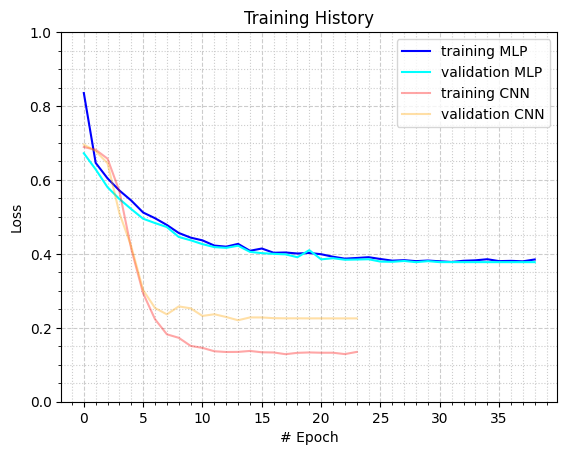

In [41]:
# plot training history
plt.plot(history.history['loss'], color='blue', label='training MLP')
plt.plot(history.history['val_loss'], color='cyan', label='validation MLP')
plt.plot(Tloss_CNN,color='red',alpha=0.35, label='training CNN')
plt.plot(Vloss_CNN,color='orange',alpha=0.35, label='validation CNN')
# plt.yscale('log')
plt.title('Training History')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.xlabel('# Epoch')
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(loc='upper right')
plt.show()

ztest shape:
(3569, 1)
112/112 [==============================] - 0s 1ms/step
Predict shape:
(3569, 1)


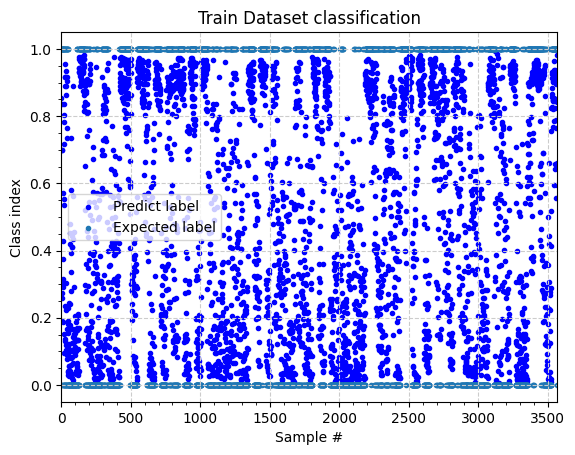

In [39]:
print("ztest shape:")
print(ztest.shape)
predict = modelMLP.predict(ytest)
print("Predict shape:")
print(predict.shape)

plt.scatter(np.linspace(1,len(predict[:,0]),len(predict[:,0])), predict[:,0], color='blue', marker='.', label='Predict label')
plt.scatter(np.linspace(1,len(predict[:,0]),len(predict[:,0])), ztest[:,0], color='C0', marker='.', label='Expected label')
plt.title('Train Dataset classification')
plt.ylabel('Class index')
plt.xlim(0,len(predict[:,0]))
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
# plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.xlabel('Sample #')
plt.legend()

*****Summary of Hyperparameters**
Drop Out CNN: 0.25
# neurons CNN: 16
batch size CNN: 128
*****
Drop Out MLP: 0.25
# neurons MLP: 16
batch size MLP: 128


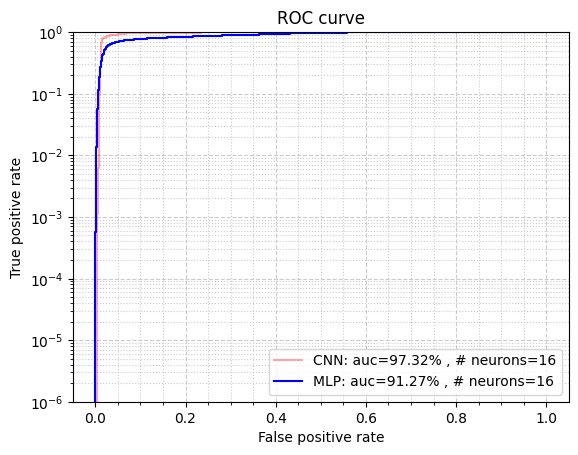

In [40]:
plt.plot(fpr,tpr, label='CNN: auc='+str(np.round(auc1*100,2))+'% , # neurons='+str(n_neurons), color='red',alpha=0.35)

df = pd.DataFrame()
fprMLP = {}
tprMLP = {}
auc1MLP = {}

fprMLP, tprMLP, thresholdMLP = roc_curve(ztest,predict)

auc1MLP = auc(fprMLP, tprMLP)

plt.plot(fprMLP,tprMLP, label='MLP: auc='+str(np.round(auc1MLP*100,2))+'% , # neurons='+str(n_neuronsMLP), color='blue')

plt.semilogy()
plt.ylim(0.000001,1)
plt.title("ROC curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.minorticks_on()
plt.tick_params(axis='x', which='both', direction='out')
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.legend(loc='lower right')

print('*****Summary of Hyperparameters**')
print('Drop Out CNN:', dropoutRate)
print('# neurons CNN:', n_neurons)
print('batch size CNN:', batch_size)
print('*****')
print('Drop Out MLP:', dropoutRateMLP)
print('# neurons MLP:', n_neuronsMLP)
print('batch size MLP:', batch_sizeMLP)

# **DISCUSSION OF RESULTS**

1.   **Dataset choise**

To reach our binary classification task, 2 different pairs of dataset (2 for the *train* task and 2 for the *test* task) have been produced. The first train dataset is more unbalanced in the 2 class,

2.   ****

